In [1]:
import matplotlib.pyplot as plt
import os, sys

In [2]:
def define_color(cell):
    if cell == '#':
        return 'black'
    elif cell == ' ':   # Espacio vacío
        return 'white'
    elif cell == 'E':   # Entrada
        return 'green'
    elif cell == 'S':   # Salida
        return 'red'

In [3]:
import os
import time
import matplotlib.pyplot as plt
from collections import deque
import heapq

def define_color(cell):
    if cell == '#':
        return 'black'
    elif cell == 'S':
        return 'green'
    elif cell == 'E':
        return 'red'
    else:
        return 'white'

class MazeLoader:
    def __init__(self, filename):
        self.filename = filename
        self.maze = None
        self.start = None
        self.end = None

    def load_Maze(self):
        _maze = []
        file_path = os.path.join(project_path, self.filename)
        print("Loading Maze from", file_path)
        with open(file_path, 'r') as file:
            for y, line in enumerate(file):
                row = list(line.strip())
                _maze.append(row)
                for x, cell in enumerate(row):
                    if cell == 'S':
                        self.start = (x, y)
                    elif cell == 'E':
                        self.end = (x, y)
        self.maze = _maze
        return self

    def plot_maze(self, path=None, title="Laberinto", filename=None, path_color='skyblue'):
        height = len(self.maze)
        width = len(self.maze[0])

        fig = plt.figure(figsize=(width/4, height/4))
        for y in range(height):
            for x in range(width):
                cell = self.maze[y][x]
                color = define_color(cell)
                plt.fill([x, x+1, x+1, x], [y, y, y+1, y+1], color=color, edgecolor='black')

        if path:
            for (x, y) in path:
                if self.maze[y][x] not in ['S', 'E']:
                    plt.fill([x, x+1, x+1, x], [y, y, y+1, y+1], color=path_color, edgecolor='black')

        plt.xlim(0, width)
        plt.ylim(0, height)
        plt.gca().invert_yaxis()
        plt.xticks([])
        plt.yticks([])
        fig.tight_layout()
        if filename:
            plt.savefig(filename, bbox_inches='tight')
        plt.show()
        return self

    def get_graph(self):
        graph = {}
        height = len(self.maze)
        width = len(self.maze[0])
        for y in range(height):
            for x in range(width):
                if self.maze[y][x] == '#':
                    continue
                neighbors = []
                if y > 0 and self.maze[y-1][x] != '#':
                    neighbors.append((x, y-1))
                if y < height - 1 and self.maze[y+1][x] != '#':
                    neighbors.append((x, y+1))
                if x > 0 and self.maze[y][x-1] != '#':
                    neighbors.append((x-1, y))
                if x < width - 1 and self.maze[y][x+1] != '#':
                    neighbors.append((x+1, y))
                graph[(x, y)] = neighbors
        return graph

    def bfs(self, graph):
        queue = deque([(self.start, [self.start])])
        visited = set()
        nodes_expanded = 0

        while queue:
            current, path = queue.popleft()
            if current in visited:
                continue
            visited.add(current)
            nodes_expanded += 1

            if current == self.end:
                return path, nodes_expanded

            for neighbor in graph.get(current, []):
                if neighbor not in visited:
                    queue.append((neighbor, path + [neighbor]))
        return None, nodes_expanded

    def astar(self, graph):
        open_set = [(self.heuristic(self.start, self.end), 0, self.start, [self.start])]
        visited = set()
        nodes_expanded = 0

        while open_set:
            _, cost, current, path = heapq.heappop(open_set)
            if current in visited:
                continue
            visited.add(current)
            nodes_expanded += 1

            if current == self.end:
                return path, nodes_expanded

            for neighbor in graph.get(current, []):
                if neighbor not in visited:
                    new_cost = cost + 1
                    priority = new_cost + self.heuristic(neighbor, self.end)
                    heapq.heappush(open_set, (priority, new_cost, neighbor, path + [neighbor]))
        return None, nodes_expanded

    def heuristic(self, a, b):
        return abs(a[0] - b[0]) + abs(a[1] - b[1])  # Manhattan

    def comparar_algoritmos(self):
        graph = self.get_graph()

        # BFS
        t0 = time.perf_counter()
        path_bfs, nodes_bfs = self.bfs(graph)
        time_bfs = time.perf_counter() - t0

        # A*
        t0 = time.perf_counter()
        path_astar, nodes_astar = self.astar(graph)
        time_astar = time.perf_counter() - t0

        print("\nComparación de Algoritmos:")
        print(f"BFS   → Tiempo: {time_bfs:.6f}s, Nodos: {nodes_bfs}, Longitud: {len(path_bfs)}")
        print(f"A*    → Tiempo: {time_astar:.6f}s, Nodos: {nodes_astar}, Longitud: {len(path_astar)}")

        # Mostrar y guardar resultados
        self.plot_maze(path=path_bfs, title="Solución BFS", filename="bfs_solution.png", path_color='skyblue')
        self.plot_maze(path=path_astar, title="Solución A*", filename="astar_solution.png", path_color='orange')


Loading Maze from d:\Inteligencia_Artificial\WS-USFQ\Taller2\P1\laberinto1.txt

Comparación de Algoritmos:
BFS   → Tiempo: 0.000049s, Nodos: 43, Longitud: 15
A*    → Tiempo: 0.000058s, Nodos: 33, Longitud: 15


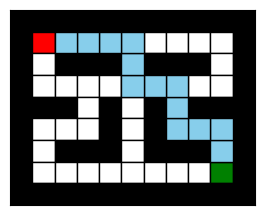

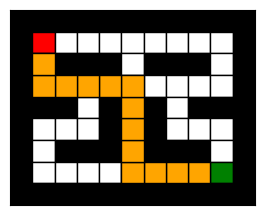

In [4]:
project_path = os.getcwd()
sys.path.append(project_path)

maze_loader = MazeLoader('laberinto1.txt')
maze_loader.load_Maze().comparar_algoritmos()

Loading Maze from d:\Inteligencia_Artificial\WS-USFQ\Taller2\P1\laberinto2.txt

Comparación de Algoritmos:
BFS   → Tiempo: 0.000517s, Nodos: 158, Longitud: 45
A*    → Tiempo: 0.000341s, Nodos: 72, Longitud: 45


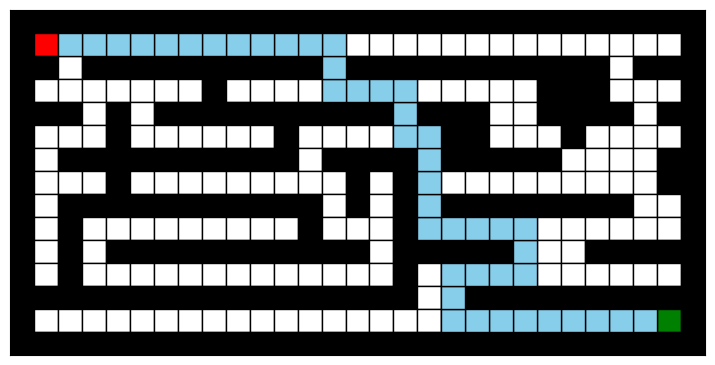

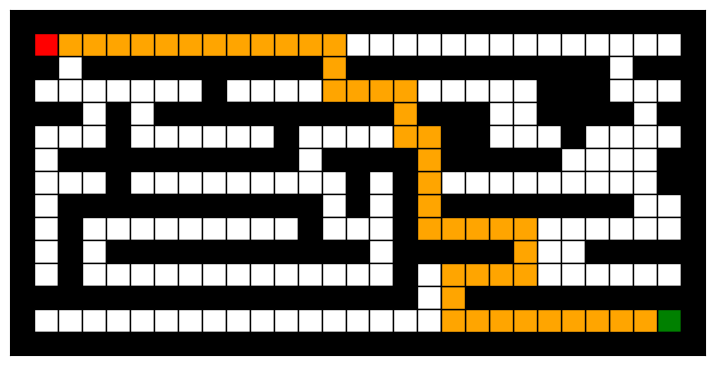

In [5]:
maze_loader = MazeLoader('laberinto2.txt')
maze_loader.load_Maze().comparar_algoritmos()

Loading Maze from d:\Inteligencia_Artificial\WS-USFQ\Taller2\P1\laberinto3.txt

Comparación de Algoritmos:
BFS   → Tiempo: 0.003794s, Nodos: 1268, Longitud: 345
A*    → Tiempo: 0.006630s, Nodos: 1262, Longitud: 345


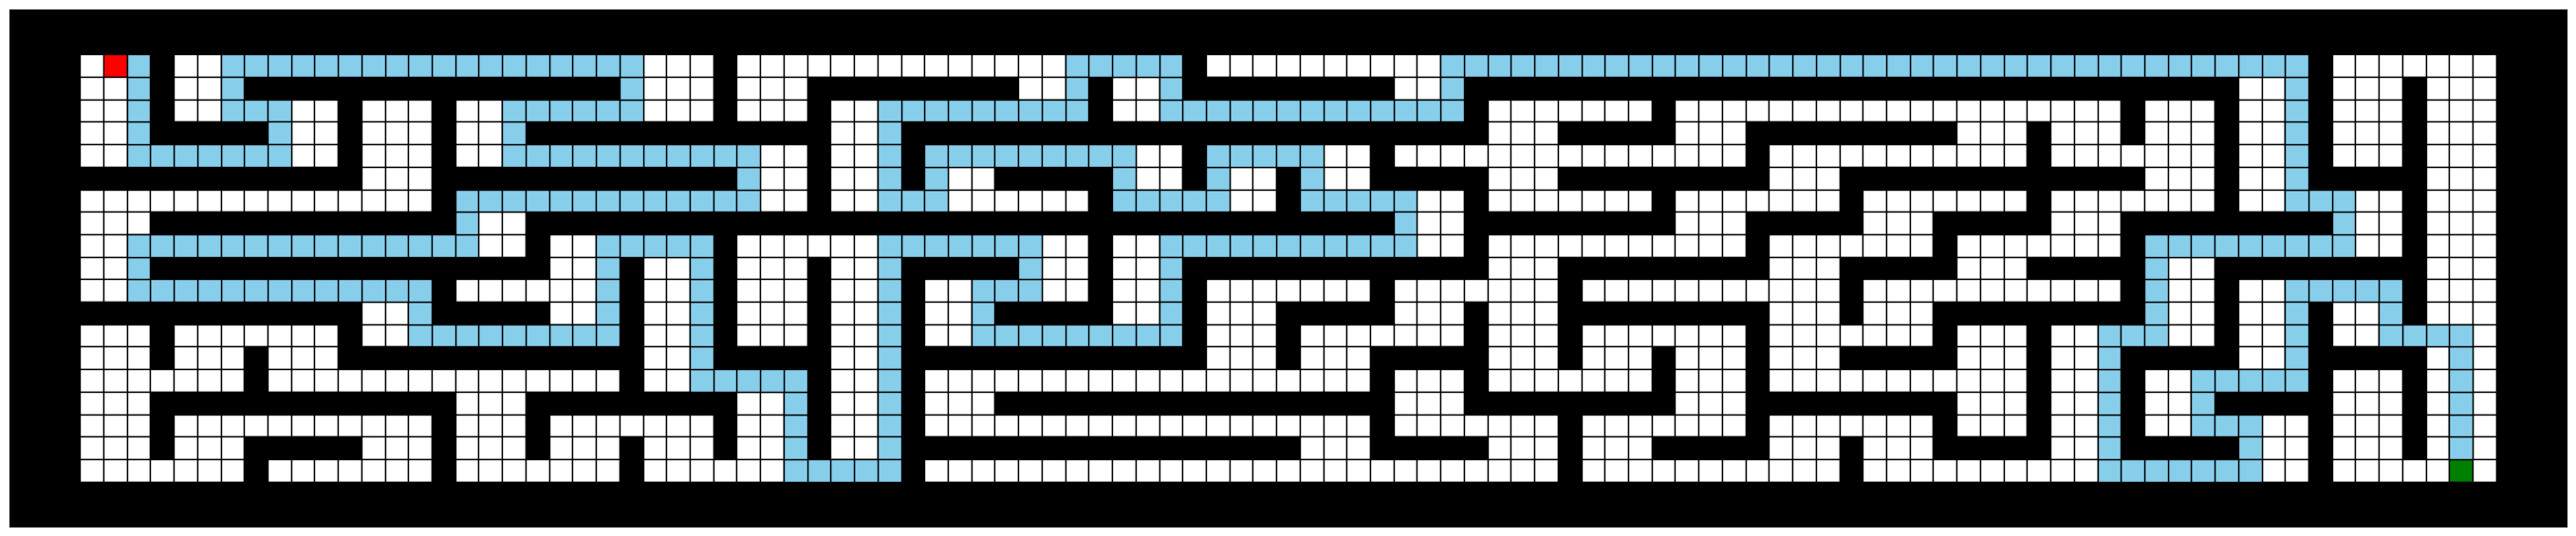

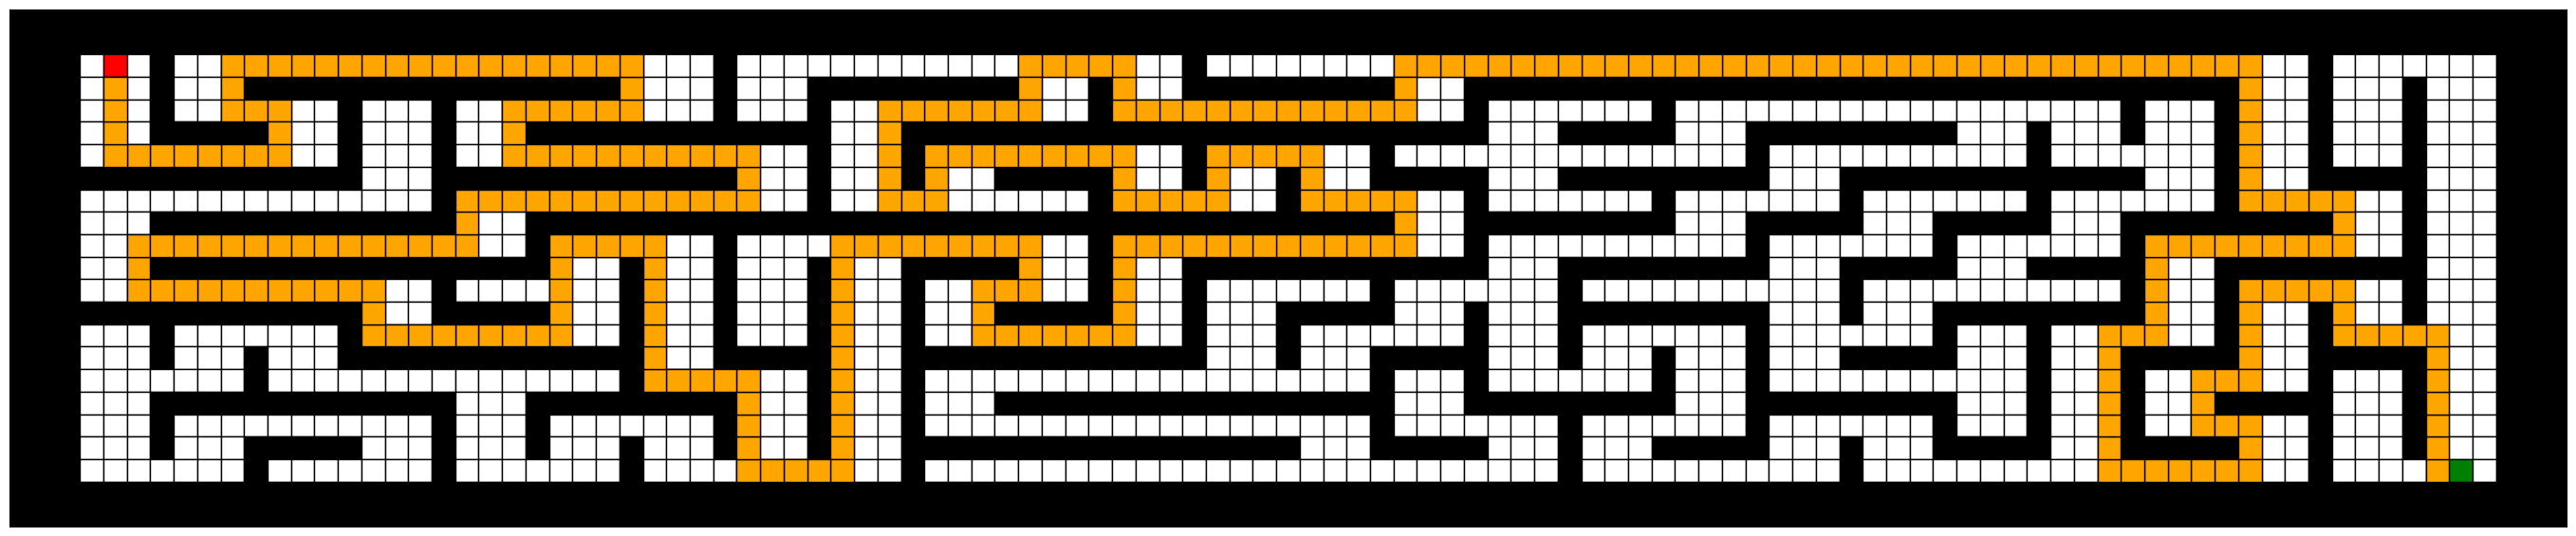

In [6]:
maze_loader = MazeLoader('laberinto3.txt')
maze_loader.load_Maze().comparar_algoritmos()

Las metricas utilizadas para comparar ambos algoritmos de búsqueda son importantes ya que nos permite evaluar la efectividad de cada uno de ellos. Tanto el tiempo como el número de nodos recorridos son métricas necesarias para saber al final cual de ellos se deben usar para un óptimo rendimiento.

Por un lado el tiempo de ejecución nos permite medir la eficiencia práctica en tiempo real. El número de nodos recorridos también es importante saber porque aquel algoritmo que expande el menor número de nodos es el que generalmente consume menos memoria y CPU.